In [1]:
import os
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import transforms

from activation.acts import get_activations,SCiU
from util.utils import vis_activations
from data.datasets import MNIST,CIFAR10, CIFAR100
from model.models import *
from experiment import Trainer,ModelCard

In [2]:
# ./activation/acts.py
acts = get_activations(return_type='dict')
acts.update({
    'ReLU':nn.ReLU(),
    'SCiU_square':SCiU(pos_multiplier=1,
                        neg_multiplier=1,
                        clip_max=1,
                        clip_min=-1),
    'SCiU_squarev4':SCiU(pos_multiplier=0.5,
                        neg_multiplier=-0.5,
                        clip_max=4,
                        clip_min=-4),           
})
acts

{'sASN': sASN(),
 'GELU': GELU(approximate='none'),
 'ASN': ASN(),
 'SoftModulusQ': SoftModulusQ(),
 'Modulus': Modulus(),
 'BipolarSigmoid': BipolarSigmoid(),
 'TanhExp': TanhExp(),
 'SCiU': SCiU(),
 'ReLU': ReLU(),
 'SCiU_square': SCiU(),
 'SCiU_squarev4': SCiU()}

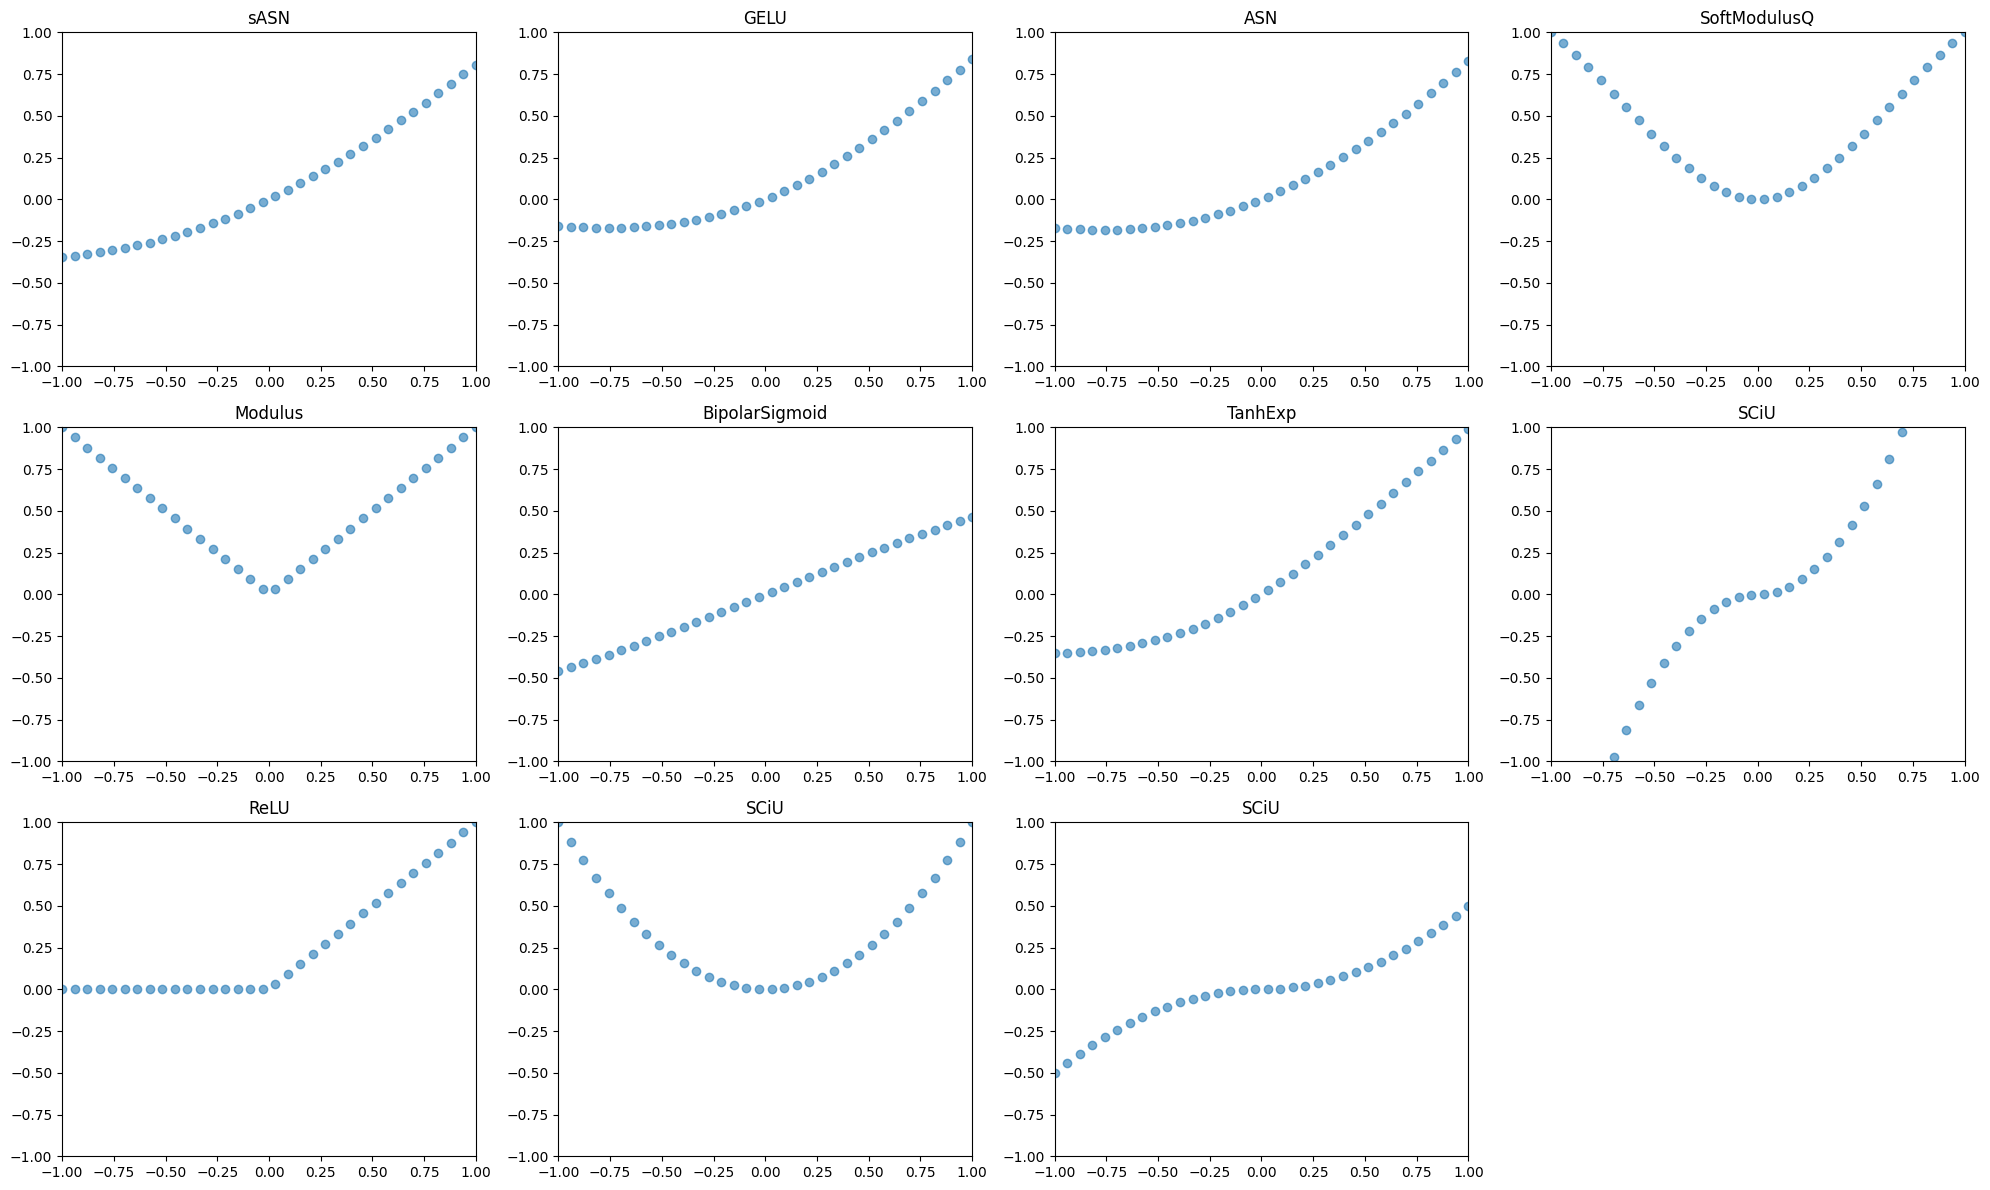

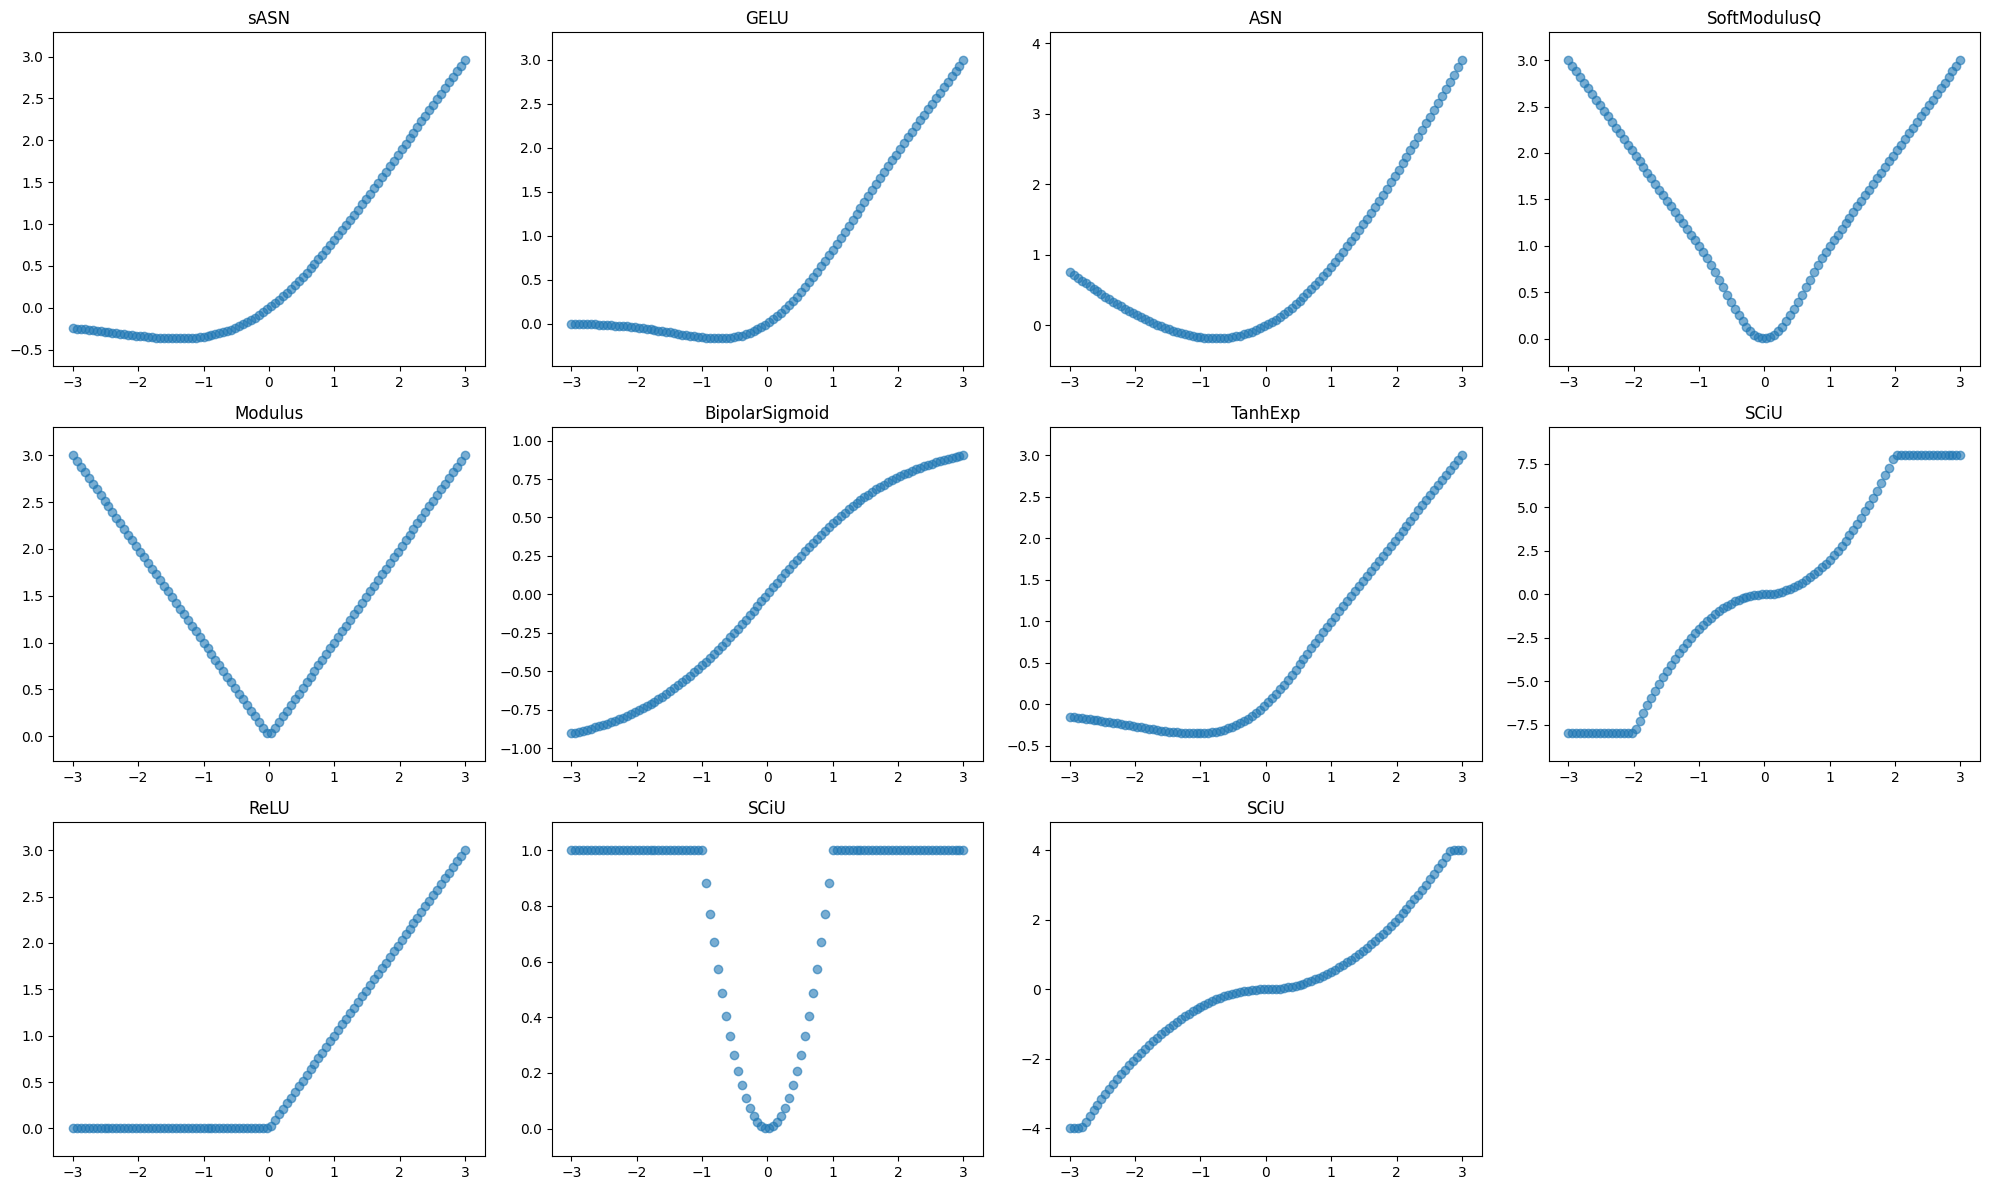

In [3]:
# visualize activation functions
x = torch.linspace(-3, 3, 100)

vis_activations(acts.values(), x, cols=4,xlim=[-1,1],ylim=[-1,1])
vis_activations(acts.values(), x, cols=4)


### Global Config

In [4]:
#
num_epochs = 50
learning_rate = 0.01
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD
optimizer_kwargs= {'lr':learning_rate, 'momentum':0.9, 'weight_decay':5e-4} # SGD
#
experiments_dir='./results'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)


cuda:0


### MNIST
- class :  0~9 
- shape : (1, 28, 28)
- train : 60,000 samples
- test : 10,000 samples
- transform : toTensor()

In [9]:
train_dataset = MNIST(train=True)
test_dataset = MNIST(train=False)

train_loader = DataLoader(dataset=train_dataset, batch_size=2048, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=2048, shuffle=False)

{'input_size': 784, 'hidden_size': 128, 'num_classes': 10}
{'input_size': 784, 'hidden_size': 128, 'num_classes': 10, 'activation': GELU(approximate='none')}
Training with GELU activation function...
Epoch [1/50], Test Loss: 2.3030, Test Accuracy: 10.20%
Epoch [2/50], Test Loss: 2.2997, Test Accuracy: 11.39%
Epoch [3/50], Test Loss: 2.2964, Test Accuracy: 12.91%
Epoch [4/50], Test Loss: 2.2931, Test Accuracy: 14.33%
Epoch [5/50], Test Loss: 2.2897, Test Accuracy: 15.43%
Epoch [6/50], Test Loss: 2.2861, Test Accuracy: 16.35%
Epoch [7/50], Test Loss: 2.2824, Test Accuracy: 17.02%
Epoch [8/50], Test Loss: 2.2785, Test Accuracy: 17.55%
Epoch [9/50], Test Loss: 2.2743, Test Accuracy: 18.13%
Epoch [10/50], Test Loss: 2.2699, Test Accuracy: 18.97%
Epoch [11/50], Test Loss: 2.2651, Test Accuracy: 20.35%
Epoch [12/50], Test Loss: 2.2598, Test Accuracy: 24.02%
Epoch [13/50], Test Loss: 2.2540, Test Accuracy: 28.68%
Epoch [14/50], Test Loss: 2.2475, Test Accuracy: 33.47%
Epoch [15/50], Test Loss:

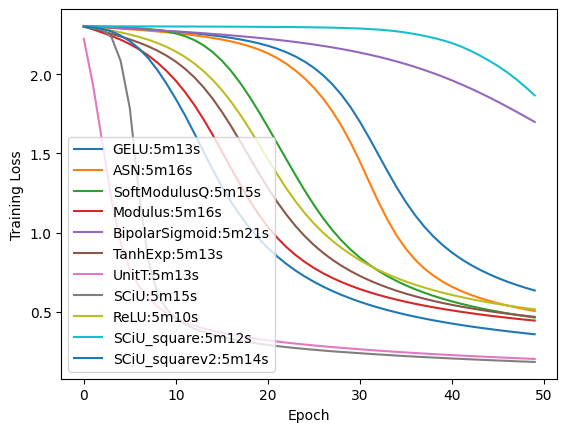

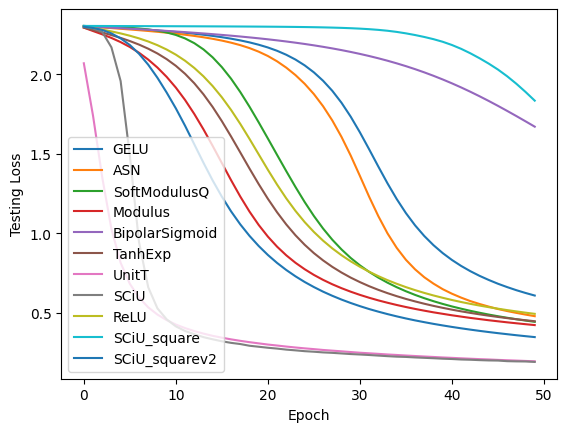

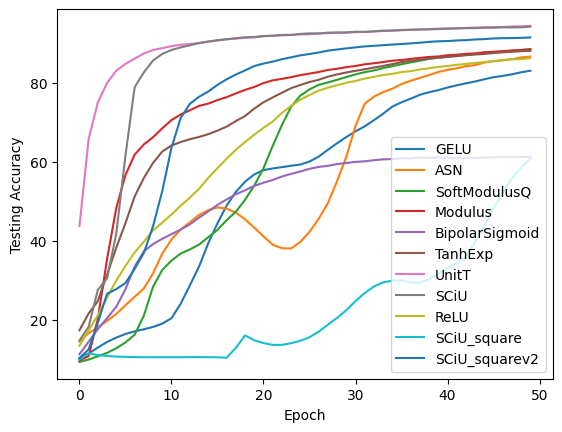

In [10]:
# model : BasicMLP
model_kwargs = {
    'input_size': 784,
    'hidden_size': 128,
    'num_classes': 10
}

model_card = ModelCard(BasicMLP,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir,model_card.name))

In [ ]:
# model : ResNet18
model_kwargs = {
    'name':'resnet18',
    'input_size': 28,
    'in_channel': 1,
    'n_classes': 10,
}

model_card = ModelCard(ResNet,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir,model_card.name))


### CIFAR10
- class :  0~9 
- shape : (3, 32, 32)
- train : 50,000
- test : 10,000
- transform : toTensor()

In [6]:
from torchvision import transforms

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_dataset = CIFAR10(train=True,transform=transform_train)
test_dataset = CIFAR10(train=False,transform=transform_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=2048, shuffle=True,num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=2048, shuffle=False,num_workers=2)

{'input_size': 3072, 'hidden_size': 76, 'num_classes': 10}
{'input_size': 3072, 'hidden_size': 76, 'num_classes': 10, 'activation': GELU(approximate='none')}
Training with GELU activation function...
Epoch [1/50], Test Loss: 2.2763, Test Accuracy: 15.60%
Epoch [2/50], Test Loss: 2.2364, Test Accuracy: 19.63%
Epoch [3/50], Test Loss: 2.1957, Test Accuracy: 21.50%
Epoch [4/50], Test Loss: 2.1573, Test Accuracy: 23.54%
Epoch [5/50], Test Loss: 2.1234, Test Accuracy: 25.13%
Epoch [6/50], Test Loss: 2.0949, Test Accuracy: 26.81%
Epoch [7/50], Test Loss: 2.0708, Test Accuracy: 27.22%
Epoch [8/50], Test Loss: 2.0511, Test Accuracy: 28.07%
Epoch [9/50], Test Loss: 2.0335, Test Accuracy: 28.86%
Epoch [10/50], Test Loss: 2.0165, Test Accuracy: 29.49%
Epoch [11/50], Test Loss: 2.0025, Test Accuracy: 30.09%
Epoch [12/50], Test Loss: 1.9881, Test Accuracy: 30.35%
Epoch [13/50], Test Loss: 1.9768, Test Accuracy: 30.66%
Epoch [14/50], Test Loss: 1.9659, Test Accuracy: 31.19%
Epoch [15/50], Test Loss:

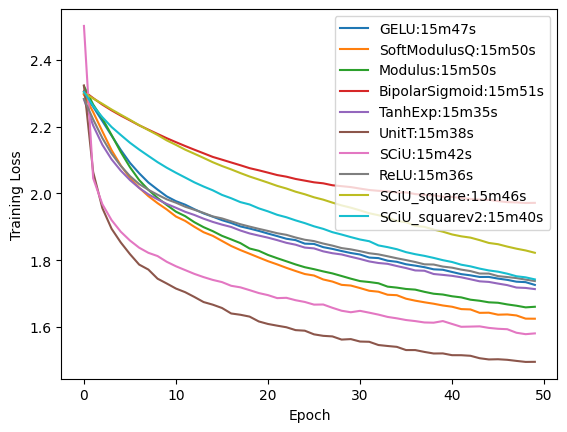

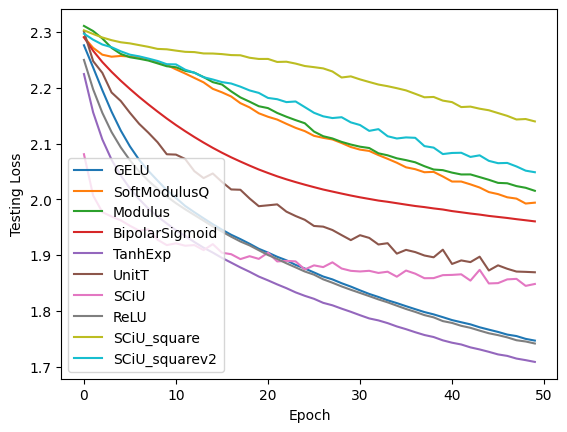

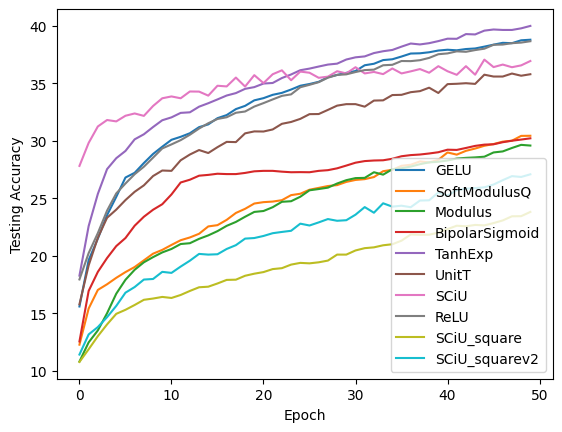

In [10]:
# model : BasicMLP
model_kwargs = {
    'input_size': 3*32*32,
    'hidden_size': 76,
    'num_classes': 10
}

model_card = ModelCard(BasicMLP,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir+'/cifar10',model_card.name))

{'name': 'resnet18', 'input_size': 32, 'in_channel': 3, 'n_classes': 10, 'num_layers': [2, 2, 2, 2]}
{'name': 'resnet18', 'input_size': 32, 'in_channel': 3, 'n_classes': 10, 'num_layers': [2, 2, 2, 2], 'activation': GELU(approximate='none')}
Training with GELU activation function...
Epoch [1/50], Test Loss: 1.8290, Test Accuracy: 33.29%
Epoch [2/50], Test Loss: 1.5323, Test Accuracy: 43.68%
Epoch [3/50], Test Loss: 1.4267, Test Accuracy: 48.32%
Epoch [4/50], Test Loss: 1.3438, Test Accuracy: 51.34%
Epoch [5/50], Test Loss: 1.3010, Test Accuracy: 53.02%
Epoch [6/50], Test Loss: 1.2314, Test Accuracy: 55.62%
Epoch [7/50], Test Loss: 1.1864, Test Accuracy: 57.58%
Epoch [8/50], Test Loss: 1.1309, Test Accuracy: 59.31%
Epoch [9/50], Test Loss: 1.1215, Test Accuracy: 60.08%
Epoch [10/50], Test Loss: 1.0699, Test Accuracy: 62.12%
Epoch [11/50], Test Loss: 1.0444, Test Accuracy: 63.24%
Epoch [12/50], Test Loss: 1.0454, Test Accuracy: 63.03%
Epoch [13/50], Test Loss: 1.0098, Test Accuracy: 64.6

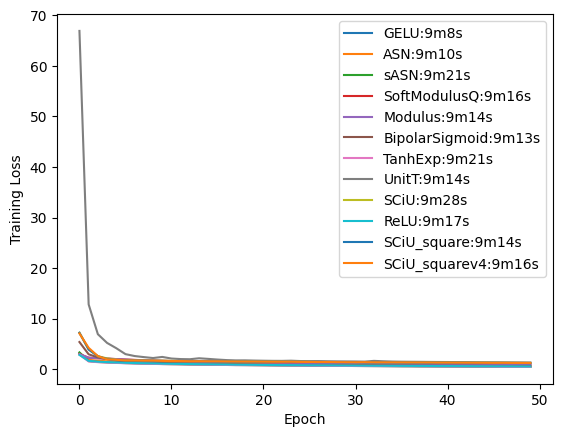

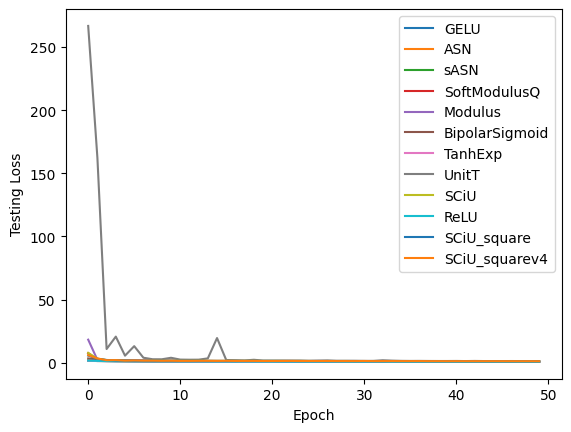

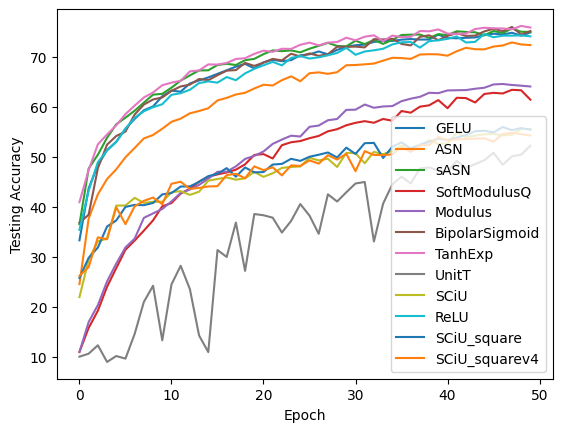

In [7]:
# model : ResNet18
model_kwargs = {
    'name':'resnet18',
    'input_size': 32,
    'in_channel': 3,
    'n_classes': 10,
    'num_layers':[2,2,2,2]
}

model_card = ModelCard(ResNet,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir+'/cifar10',model_card.name))

### CIFAR100
- class :  0~9 
- shape : (3, 32, 32)
- train : 50,000
- test : 10,000
- transform : toTensor()

In [11]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_dataset = CIFAR100(train=True,transform=transform_train)
test_dataset = CIFAR100(train=False,transform=transform_test)


train_loader = DataLoader(dataset=train_dataset, batch_size=512, shuffle=True,num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=512, shuffle=False,num_workers=2)

{'name': 'resnet18', 'input_size': 32, 'in_channel': 3, 'n_classes': 100, 'num_layers': [2, 2, 2, 2]}
{'name': 'resnet18', 'input_size': 32, 'in_channel': 3, 'n_classes': 100, 'num_layers': [2, 2, 2, 2], 'activation': sASN()}
Training with sASN activation function...
Epoch [1/50], Test Loss: 5.0938, Test Accuracy: 8.17%
Epoch [2/50], Test Loss: 3.7596, Test Accuracy: 14.63%
Epoch [3/50], Test Loss: 3.4676, Test Accuracy: 18.03%
Epoch [4/50], Test Loss: 3.3030, Test Accuracy: 21.14%
Epoch [5/50], Test Loss: 3.1857, Test Accuracy: 23.23%
Epoch [6/50], Test Loss: 3.0470, Test Accuracy: 26.11%
Epoch [7/50], Test Loss: 2.9422, Test Accuracy: 27.57%
Epoch [8/50], Test Loss: 2.8748, Test Accuracy: 28.80%
Epoch [9/50], Test Loss: 2.8043, Test Accuracy: 30.09%
Epoch [10/50], Test Loss: 2.7226, Test Accuracy: 31.56%
Epoch [11/50], Test Loss: 2.6554, Test Accuracy: 32.46%
Epoch [12/50], Test Loss: 2.6153, Test Accuracy: 33.48%
Epoch [13/50], Test Loss: 2.5604, Test Accuracy: 35.16%
Epoch [14/50],

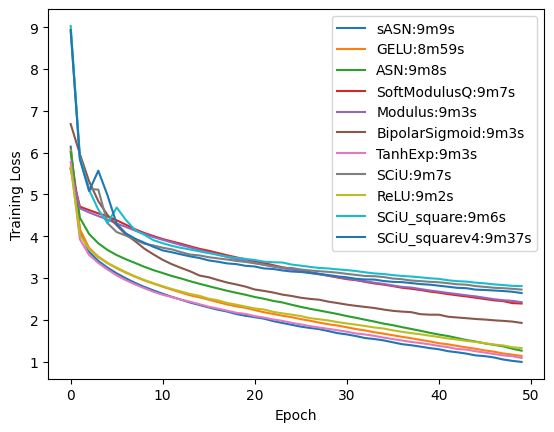

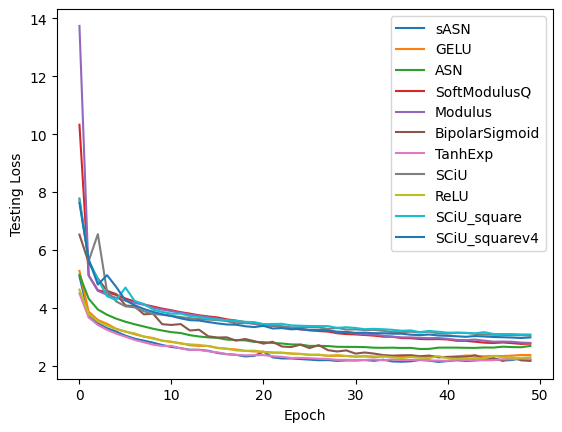

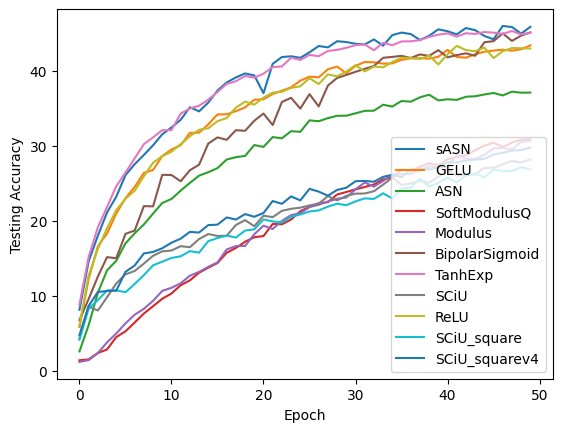

In [11]:
# model : ResNet18
model_kwargs = {
    'name':'resnet18',
    'input_size': 32,
    'in_channel': 3,
    'n_classes': 100,
    'num_layers':[2,2,2,2],
}

model_card = ModelCard(ResNet,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir+'/cifar100',model_card.name))


{'name': 'gMLP', 'input_size': 32, 'in_channel': 3, 'n_classes': 100, 'patch_size': 16, 'dim': 256, 'depth': 18}
{'name': 'gMLP', 'input_size': 32, 'in_channel': 3, 'n_classes': 100, 'patch_size': 16, 'dim': 256, 'depth': 18, 'activation': sASN()}
Training with sASN activation function...


Epoch [1/50], Test Loss: 4.1498, Test Accuracy: 7.08%
Epoch [2/50], Test Loss: 4.0169, Test Accuracy: 8.52%
Epoch [3/50], Test Loss: 3.8905, Test Accuracy: 10.54%
Epoch [4/50], Test Loss: 3.7838, Test Accuracy: 12.55%
Epoch [5/50], Test Loss: 3.6928, Test Accuracy: 13.73%
Epoch [6/50], Test Loss: 3.6235, Test Accuracy: 14.99%
Epoch [7/50], Test Loss: 3.5540, Test Accuracy: 15.93%
Epoch [8/50], Test Loss: 3.5049, Test Accuracy: 16.87%
Epoch [9/50], Test Loss: 3.4096, Test Accuracy: 18.46%
Epoch [10/50], Test Loss: 3.3682, Test Accuracy: 19.92%
Epoch [11/50], Test Loss: 3.3203, Test Accuracy: 20.20%
Epoch [12/50], Test Loss: 3.2765, Test Accuracy: 21.11%
Epoch [13/50], Test Loss: 3.2382, Test Accuracy: 21.75%
Epoch [14/50], Test Loss: 3.1914, Test Accuracy: 22.31%
Epoch [15/50], Test Loss: 3.1667, Test Accuracy: 23.82%
Epoch [16/50], Test Loss: 3.1226, Test Accuracy: 24.15%
Epoch [17/50], Test Loss: 3.1146, Test Accuracy: 24.37%
Epoch [18/50], Test Loss: 3.0738, Test Accuracy: 24.25%
Epo

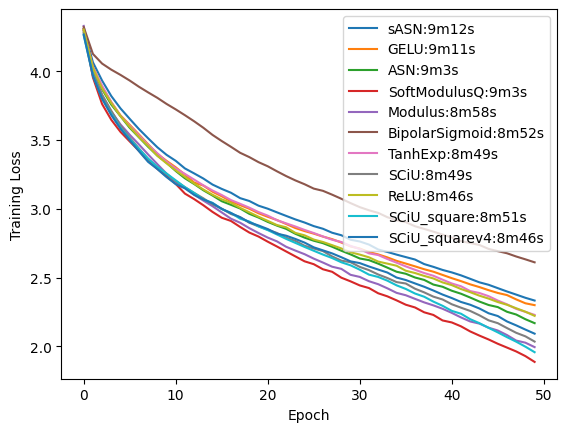

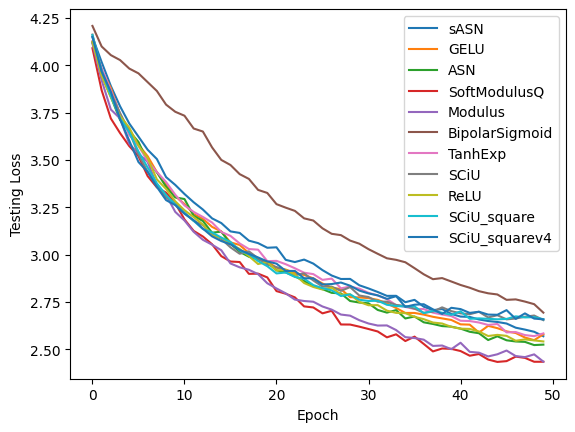

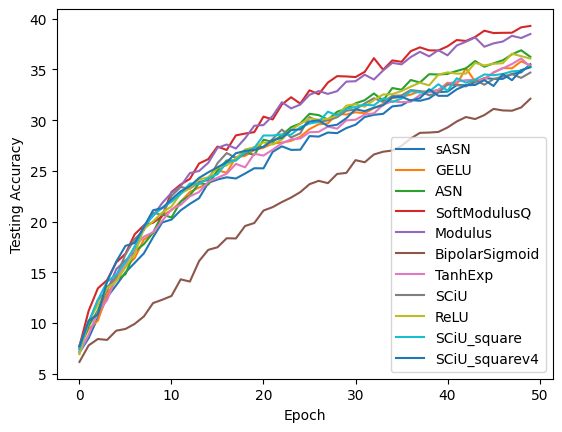

In [12]:
# model : gMLP
model_kwargs = {
    'name':'gMLP',
    'input_size': 32,
    'in_channel': 3,
    'n_classes': 100,
    'patch_size':16,
    'dim':256,
    'depth':18
}

model_card = ModelCard(gMlpVision,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=criterion,
                  optimizer=optimizer,
                  optimizer_kwargs= optimizer_kwargs,
                  device=device)

trainer.run_pipline(acts,
                    num_epochs=num_epochs,
                    experiments_dir=os.path.join(experiments_dir+'/cifar100_gMLP',model_card.name))
